In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
books = pd.read_csv('Books.csv',encoding='latin-1',dtype={3:str},low_memory=False)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
books.shape

(271360, 8)

In [4]:
users = pd.read_csv('Users.csv',encoding='latin-1')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
users.shape

(278858, 3)

In [6]:
ratings = pd.read_csv('Ratings.csv',encoding='latin-1')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
ratings.shape

(1149780, 3)

## Total missing value 

In [8]:
books.shape

(271360, 8)

In [9]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
users.shape

(278858, 3)

In [11]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [12]:
ratings.shape

(1149780, 3)

In [13]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

## Duplicate values -- No Duplicate values in any data frame

In [14]:
books[books.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [15]:
users[users.duplicated()]

,User-ID,Location,Age


In [16]:
ratings[ratings.duplicated()]

,User-ID,ISBN,Book-Rating


## Data Preprocessing -- Joining all the three Data Frame

In [17]:
df = books.merge(ratings, on ='ISBN')[['Book-Title','Book-Author','Year-Of-Publication','Publisher','Image-URL-M','User-ID','Book-Rating']]
df.head()

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating
0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0
1,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5
2,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [18]:
df1 = df.merge(users,on='User-ID')[['Book-Title','Book-Author','Year-Of-Publication','Publisher','Image-URL-M','User-ID','Book-Rating','Location']]
df1.head()

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating,Location
0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa"
1,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada"
2,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada"
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada"
4,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada"


In [25]:
df1.shape

(1031136, 8)

In [26]:
df1.dropna(inplace=True)

In [27]:
df1.isnull().sum()

Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-M            0
User-ID                0
Book-Rating            0
Location               0
dtype: int64

## EDA :- 

### 1. Top 10 Fab Authors including based on single purchases by user

In [28]:
author_user_counts = df.groupby('Book-Author')['User-ID'].nunique()
author_user_counts.head()

Book-Author
 D. Chiel                           4
 J. D. Landis                       1
 Mimma Balia                        1
'N Sync                             1
142 moms from all over the world    1
Name: User-ID, dtype: int64

In [29]:
top10_auth = author_user_counts.sort_values(ascending=False).head(10)

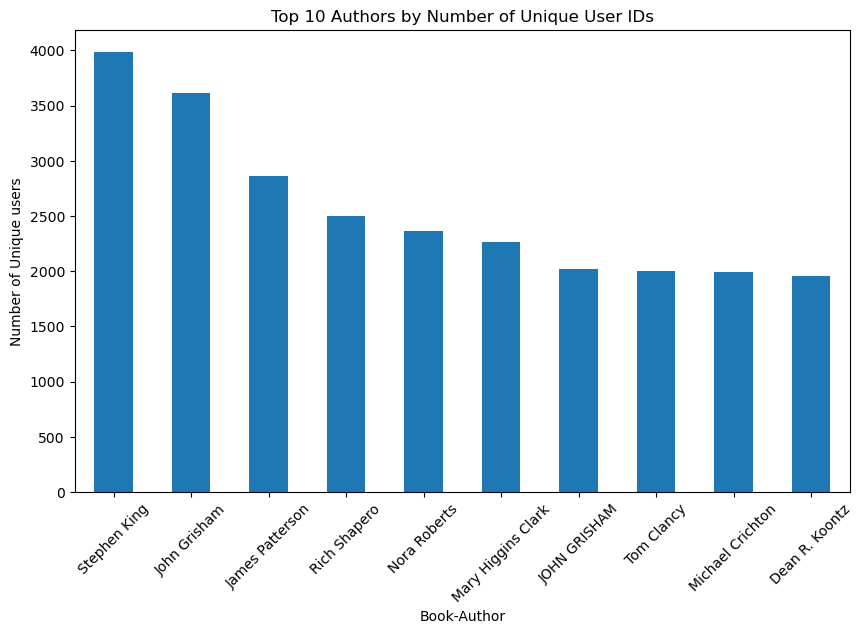

In [30]:
top10_auth.plot(kind = 'bar',figsize = (10,6))
plt.title("Top 10 Authors by Number of Unique User IDs")
plt.xlabel("Book-Author")
plt.ylabel('Number of Unique users')
plt.xticks(rotation = 45)
plt.show()

## 2. Top 10 Popular Books including based on single time purchases

In [33]:
fav_books_counts = df1.groupby('Book-Title')['User-ID'].nunique()
fav_books_counts.head()
top10_fav_books = fav_books_counts.sort_values(ascending=False)[:10]
top10_fav_books

Book-Title
Wild Animus                                        2502
The Lovely Bones: A Novel                          1295
The Da Vinci Code                                   897
The Nanny Diaries: A Novel                          821
A Painted House                                     818
Bridget Jones's Diary                               772
The Secret Life of Bees                             762
Divine Secrets of the Ya-Ya Sisterhood: A Novel     737
The Red Tent (Bestselling Backlist)                 723
Angels &amp; Demons                                 661
Name: User-ID, dtype: int64

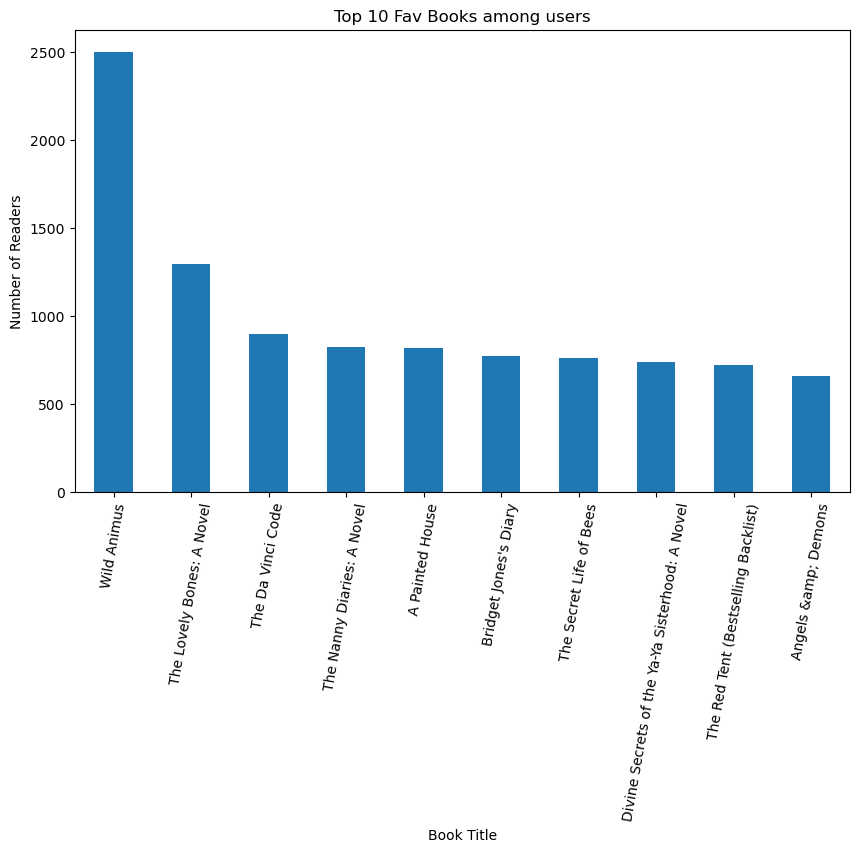

In [34]:
top10_fav_books.plot(kind = 'bar',figsize = (10,6))
plt.title('Top 10 Fav Books among users')
plt.xlabel('Book Title')
plt.ylabel('Number of Readers')
plt.xticks(rotation = 80)
plt.show()

## 3. Filter users who have read more than 50 books and sort them based on rating given to books